# Exploratory Data Analysis (EDA) - Kaggle Bike Sharing Demand

Data source: https://www.kaggle.com/c/bike-sharing-demand/data

## Data Description

The Kaggle website (https://www.kaggle.com/c/bike-sharing-demand/data) data description: 
"You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period."

### Data Fields

- **datetime** - hourly date + timestamp  
- **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- **holiday** - whether the day is considered a holiday
- **workingday** - whether the day is neither a weekend nor holiday
- **weather**
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- **temp** - temperature in Celsius
- **atemp** - "feels like" temperature in Celsius
- **humidity** - relative humidity
- **windspeed** - wind speed
- **casual** - number of non-registered user rentals initiated
- **registered** - number of registered user rentals initiated
- **count** - number of total rentals

## Summary
This jupyter notebooks covers the basis EDA of the training data set of the Kaggle Bike Sharing Demand competition.

## Library and Data Loading

In [1]:
library(ggplot2)
suppressWarnings(suppressMessages(library(dplyr)))
suppressWarnings(suppressMessages(library(car)))
suppressWarnings(suppressMessages(library(repr)))

df <- read.csv("train.csv" , header=TRUE, stringsAsFactors = FALSE)

## Initial Data Exploration

### Individual Feature Statistics

In [2]:
str(df, vec.len=3)
head(df,10)
summary(df)

'data.frame':	10886 obs. of  12 variables:
 $ datetime  : chr  "2011-01-01 00:00:00" "2011-01-01 01:00:00" "2011-01-01 02:00:00" ...
 $ season    : int  1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 ...
 $ workingday: int  0 0 0 0 0 0 0 0 ...
 $ weather   : int  1 1 1 1 1 2 1 1 ...
 $ temp      : num  9.84 9.02 9.02 9.84 9.84 9.84 9.02 8.2 ...
 $ atemp     : num  14.4 13.6 13.6 14.4 ...
 $ humidity  : int  81 80 80 75 75 75 80 86 ...
 $ windspeed : num  0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 ...
 $ registered: int  13 32 27 10 1 1 0 2 ...
 $ count     : int  16 40 32 13 1 1 2 3 ...


datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


   datetime             season         holiday          workingday    
 Length:10886       Min.   :1.000   Min.   :0.00000   Min.   :0.0000  
 Class :character   1st Qu.:2.000   1st Qu.:0.00000   1st Qu.:0.0000  
 Mode  :character   Median :3.000   Median :0.00000   Median :1.0000  
                    Mean   :2.507   Mean   :0.02857   Mean   :0.6809  
                    3rd Qu.:4.000   3rd Qu.:0.00000   3rd Qu.:1.0000  
                    Max.   :4.000   Max.   :1.00000   Max.   :1.0000  
    weather           temp           atemp          humidity     
 Min.   :1.000   Min.   : 0.82   Min.   : 0.76   Min.   :  0.00  
 1st Qu.:1.000   1st Qu.:13.94   1st Qu.:16.66   1st Qu.: 47.00  
 Median :1.000   Median :20.50   Median :24.24   Median : 62.00  
 Mean   :1.418   Mean   :20.23   Mean   :23.66   Mean   : 61.89  
 3rd Qu.:2.000   3rd Qu.:26.24   3rd Qu.:31.06   3rd Qu.: 77.00  
 Max.   :4.000   Max.   :41.00   Max.   :45.45   Max.   :100.00  
   windspeed          casual         regi

### Histograms of count, registered and casual per hour

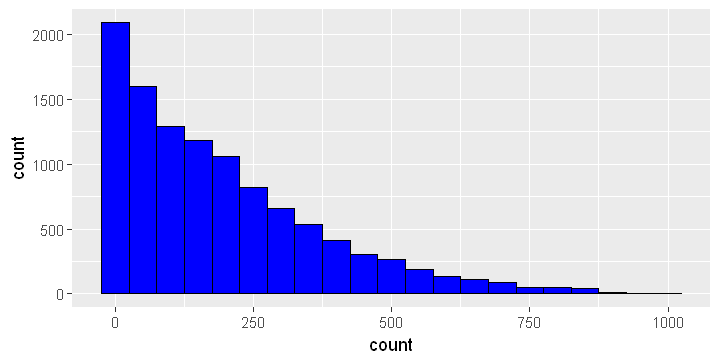

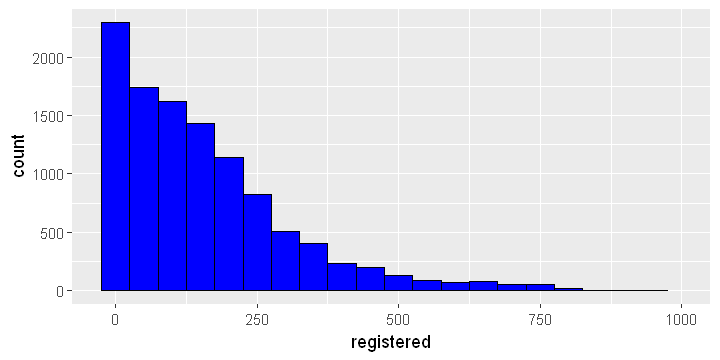

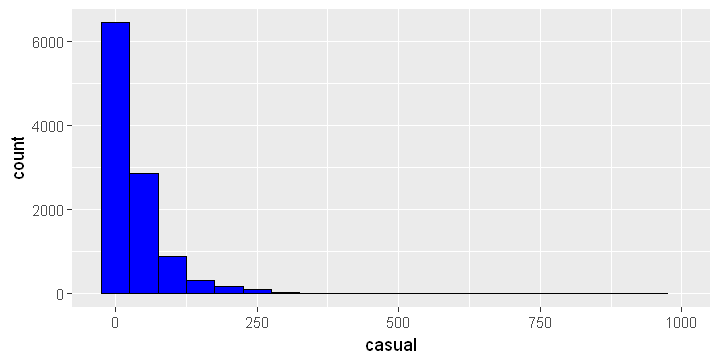

In [3]:
options(repr.plot.width=6, repr.plot.height=3 )
bin.width=50

ggplot(data=df, aes_string("count")) +
  geom_histogram(binwidth = bin.width, col="black", fill="blue")

ggplot(data=df, aes_string("registered")) +
  geom_histogram(binwidth = bin.width, col="black", fill="blue") +
  xlim(-25, 1000)

ggplot(data=df, aes_string("casual")) +
  geom_histogram(binwidth = bin.width, col="black", fill="blue") +
  xlim(-25, 1000)

## Feature Extraction and Improvement
### Extracting Time Information

In [4]:
df$year <- as.integer(substr(df$datetime,1,4))
df$month <- as.integer(substr(df$datetime,6,7))
df$day <- as.integer(substr(df$datetime,9,10))
df$hour <- as.integer(substr(df$datetime,12,13))

# creating year_month as factor
df$year_month <- paste(substr(df$datetime,3,4),substr(df$datetime,6,7), sep="/")
df$year_month <- as.factor(df$year_month) 

### Categorical Features

In [5]:

df$season <- as.factor(df$season)
df$weather <- as.factor(df$weather)
df$holiday <- as.factor(df$holiday)
df$workingday <- as.factor(df$workingday) 

#### Counts per Level

In [6]:
summary( df[, c("season","holiday", "workingday", "weather")] )

 season   holiday   workingday weather 
 1:2686   0:10575   0:3474     1:7192  
 2:2733   1:  311   1:7412     2:2834  
 3:2733                        3: 859  
 4:2734                        4:   1  

## Correlation and Apparent Relationships
### Numeric Relationships
#### Scatter Plot Matrix of Numerical Features

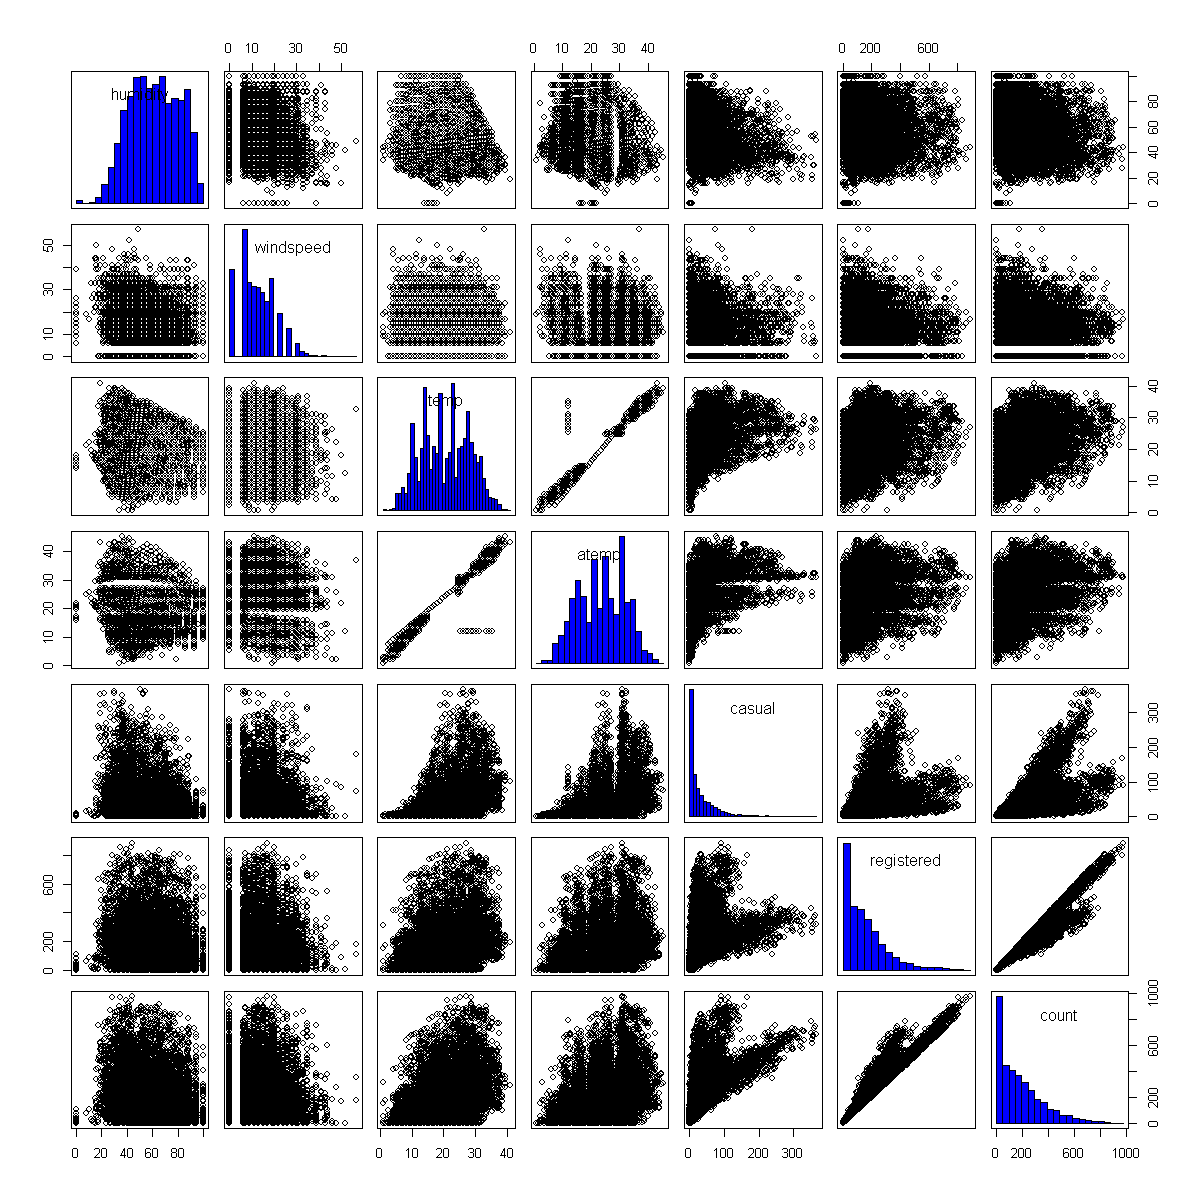

In [7]:
# set color for histograms
options(repr.plot.width=10, repr.plot.height=10 )
palette( c("black", "red", "blue", "green",  "cyan", "magenta", "yellow", "gray") )

scatterplotMatrix(~humidity+windspeed+temp+atemp+casual+registered+count, data=df,
                  diagonal="histogram", nclass=30,
                  reg.line="",
                  smooth="")

palette("default") 

### Relationships of Time Featues with count, regisitered and casual

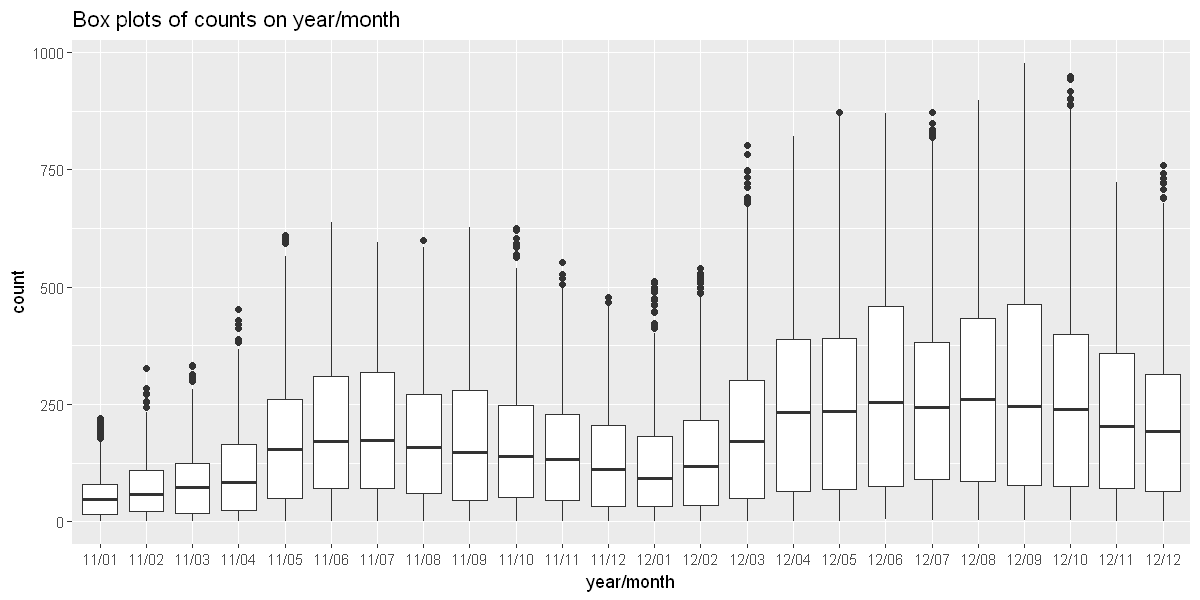

In [8]:
options(repr.plot.width=10, repr.plot.height=5 )
ggplot(df, aes(x=year_month, y=count)) +
  geom_boxplot() +
  ggtitle("Box plots of counts on year/month") +
  xlab("year/month")

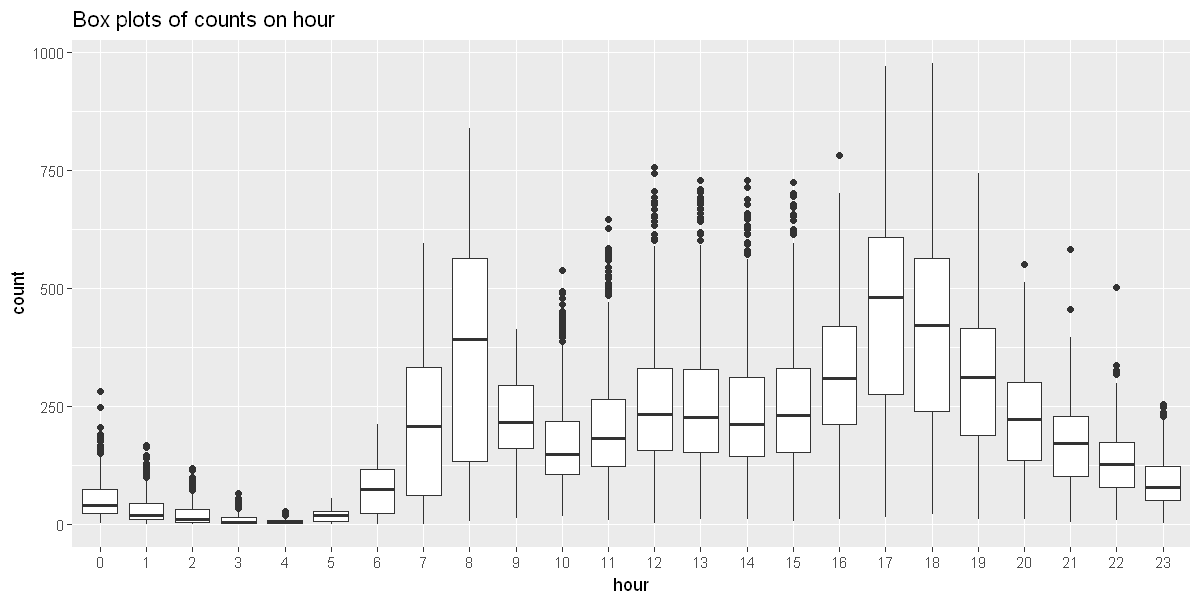

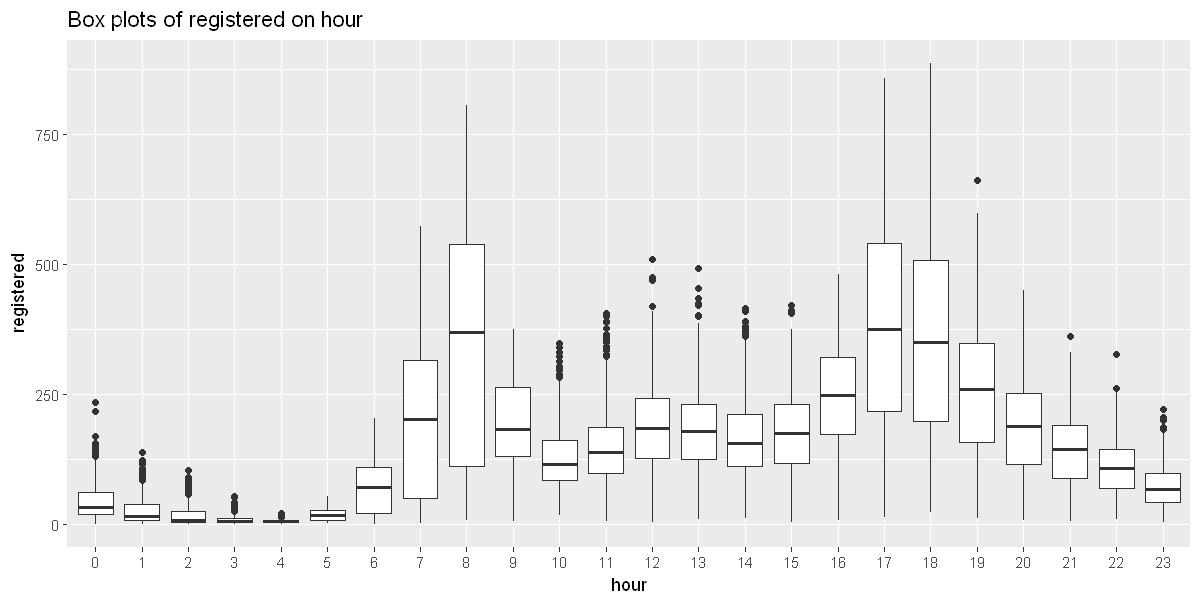

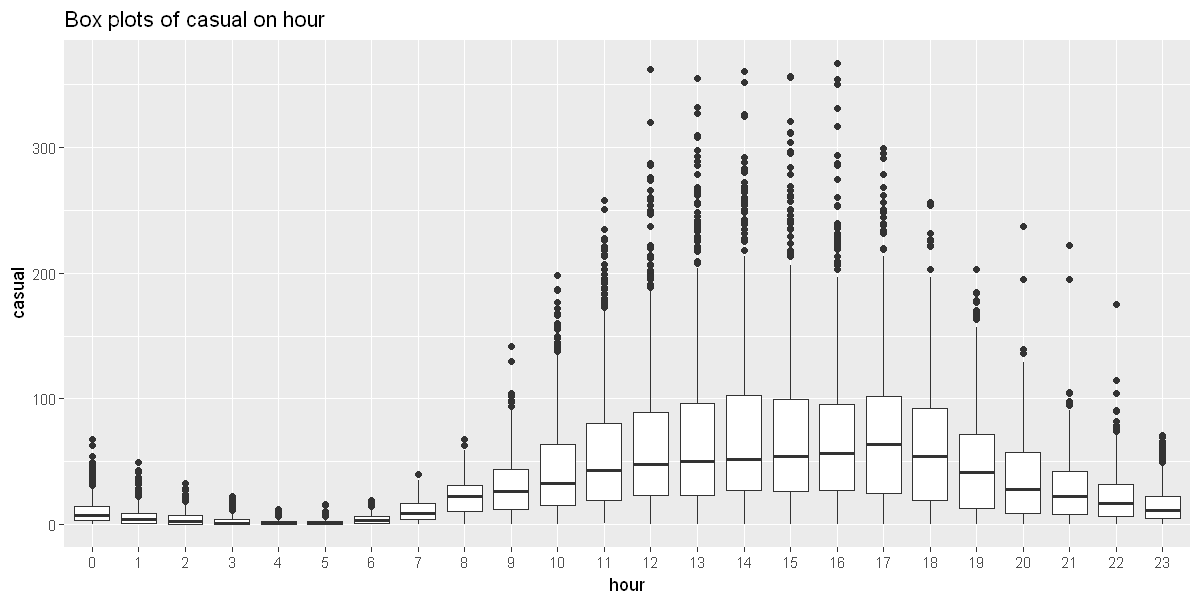

In [9]:
df$hour <- as.factor(df$hour)
ggplot(df, aes(x=hour, y=count)) +
  geom_boxplot() +
  ggtitle("Box plots of counts on hour")

df$hour <- as.factor(df$hour)
ggplot(df, aes(x=hour, y=registered)) +
  geom_boxplot() +
  ggtitle("Box plots of registered on hour")

df$hour <- as.factor(df$hour)
ggplot(df, aes(x=hour, y=casual)) +
  geom_boxplot() +
  ggtitle("Box plots of casual on hour")

### Categorical Relationships

#### Apparent Correlations with count

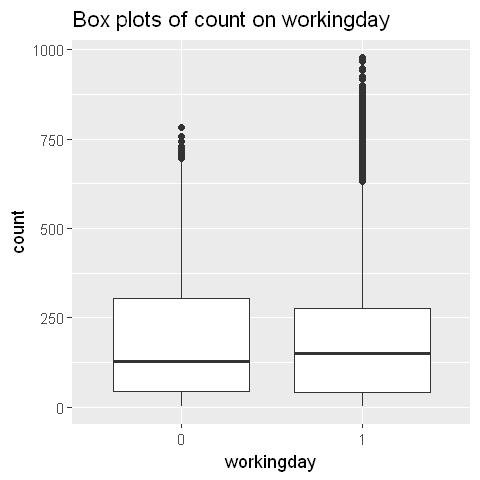

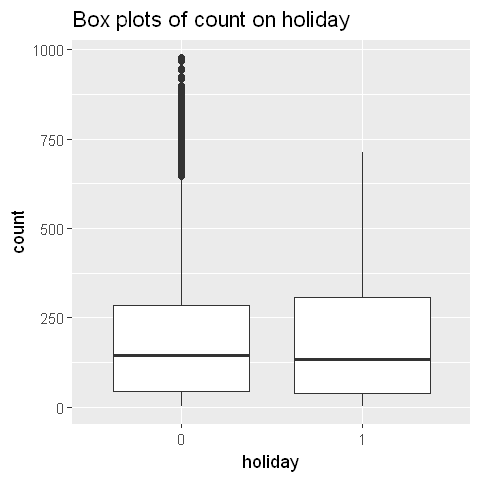

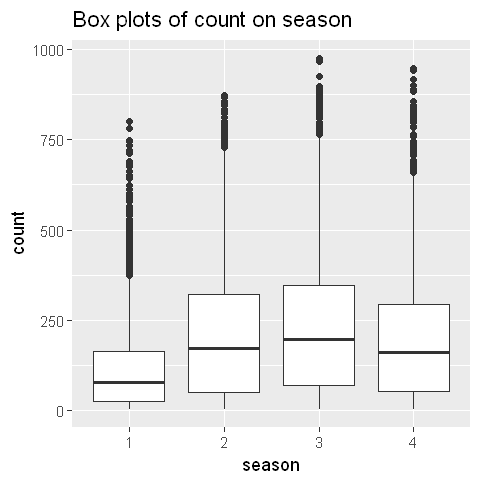

In [10]:
options(repr.plot.width=4, repr.plot.height=4 )
ggplot(df, aes(x=workingday, y=count)) +
  geom_boxplot() +
  ggtitle("Box plots of count on workingday")

ggplot(df, aes(x=holiday, y=count)) +
  geom_boxplot() +
  ggtitle("Box plots of count on holiday")

ggplot(df, aes(x=season, y=count)) +
  geom_boxplot() +
  ggtitle("Box plots of count on season")

##### Multi-faceted Relationships

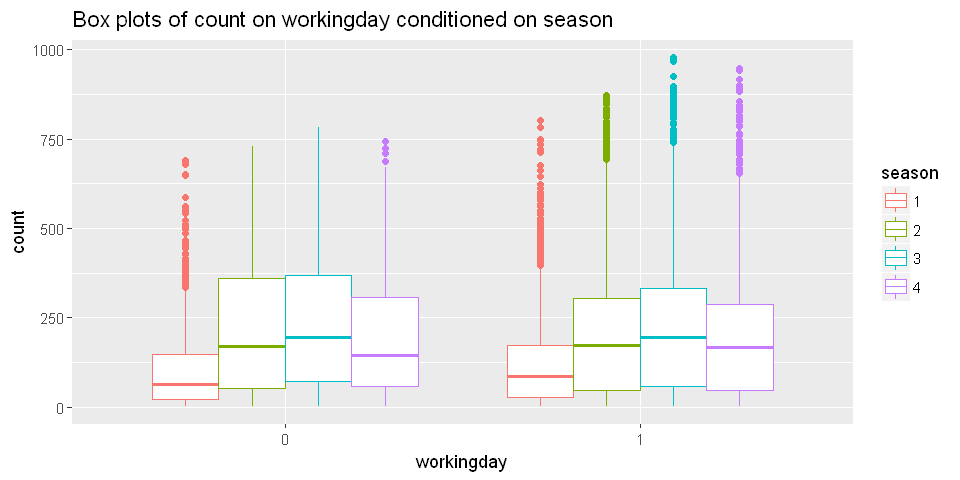

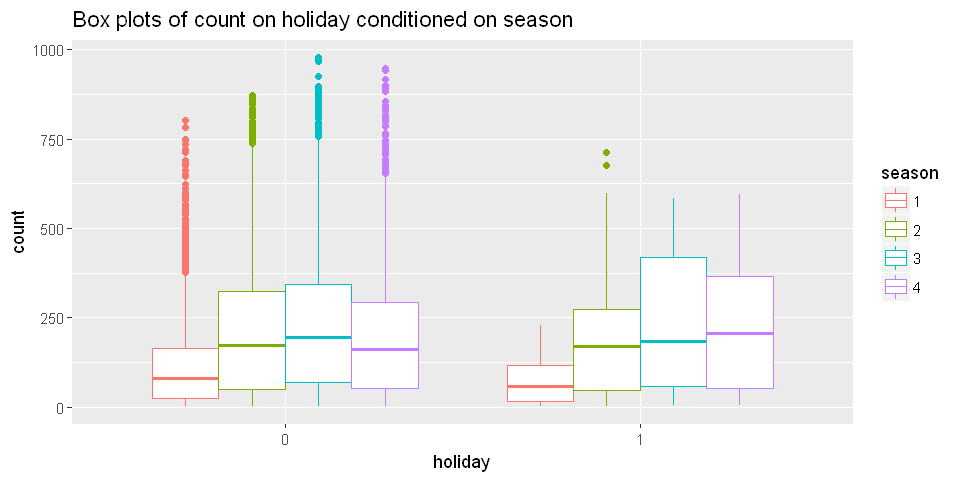

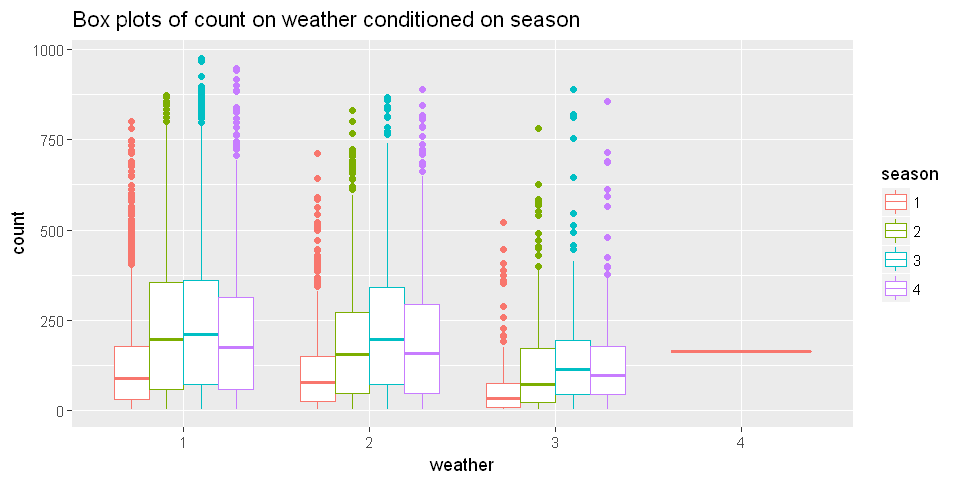

In [11]:
options(repr.plot.width=8, repr.plot.height=4 )
ggplot(df, aes(x=workingday, y=count)) +
  geom_boxplot(aes(color = season)) +
  ggtitle("Box plots of count on workingday conditioned on season")

ggplot(df, aes(x=holiday, y=count)) +
  geom_boxplot(aes(color = season)) +
  ggtitle("Box plots of count on holiday conditioned on season")

ggplot(df, aes(x=weather, y=count)) +
  geom_boxplot(aes(color = season)) +
  ggtitle("Box plots of count on weather conditioned on season")

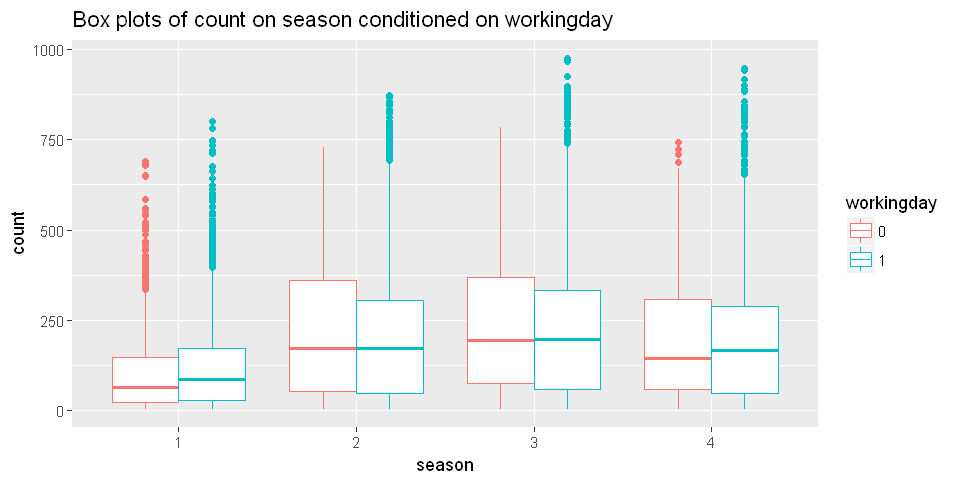

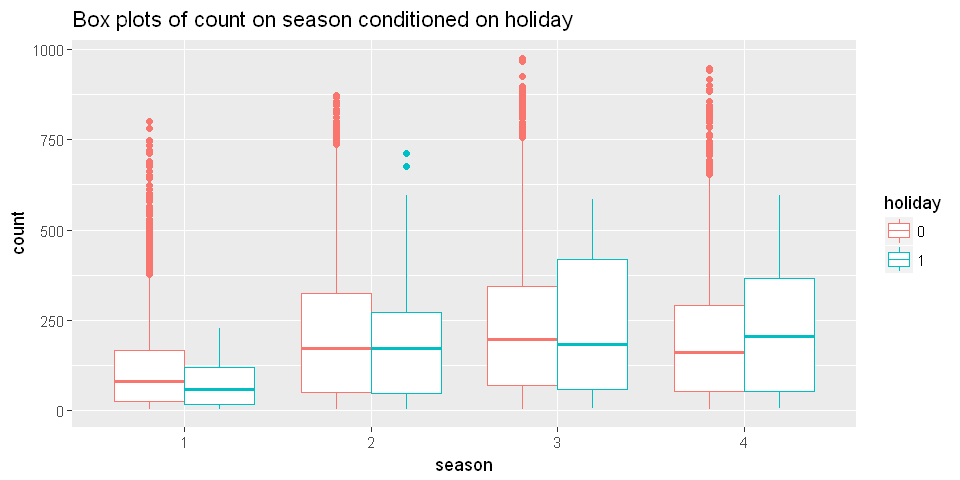

In [12]:
ggplot(df, aes(x=season, y=count)) +
  geom_boxplot(aes(color = workingday)) +
  ggtitle("Box plots of count on season conditioned on workingday")

ggplot(df, aes(x=season, y=count)) +
  geom_boxplot(aes(color = holiday)) +
  ggtitle("Box plots of count on season conditioned on holiday")
